In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lianurmalasari","key":"50f0e4120fd7c29d1320752e3b28a4bb"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d muratkokludataset/pistachio-dataset

 55% 1.00M/1.82M [00:00<00:00, 1.50MB/s]
100% 1.82M/1.82M [00:00<00:00, 2.39MB/s]


In [4]:
!mkdir pistachio-dataset
!unzip pistachio-dataset.zip -d pistachio-dataset
!ls pistachio-dataset

Archive:  pistachio-dataset.zip
  inflating: pistachio-dataset/Pistachio_Dataset/Pistachio_16_Features_Dataset/Pistachio_16_Features_Dataset.arff  
  inflating: pistachio-dataset/Pistachio_Dataset/Pistachio_16_Features_Dataset/Pistachio_16_Features_Dataset.xls  
  inflating: pistachio-dataset/Pistachio_Dataset/Pistachio_16_Features_Dataset/Pistachio_16_Features_Dataset.xlsx  
  inflating: pistachio-dataset/Pistachio_Dataset/Pistachio_16_Features_Dataset/Pistachio_16_Features_Dataset_Citation_Request.txt  
  inflating: pistachio-dataset/Pistachio_Dataset/Pistachio_28_Features_Dataset/Pistachio_28_Features_Dataset.arff  
  inflating: pistachio-dataset/Pistachio_Dataset/Pistachio_28_Features_Dataset/Pistachio_28_Features_Dataset.xls  
  inflating: pistachio-dataset/Pistachio_Dataset/Pistachio_28_Features_Dataset/Pistachio_28_Features_Dataset.xlsx  
  inflating: pistachio-dataset/Pistachio_Dataset/Pistachio_28_Features_Dataset/Pistachio_28_Features_Dataset_Citation_Request.txt  
Pistachio_

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_excel('/content/pistachio-dataset/Pistachio_Dataset/Pistachio_16_Features_Dataset/Pistachio_16_Features_Dataset.xlsx')

In [7]:
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,63391,1568.405,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,0.0062,0.0037,0.5297,0.8734,Kirmizi_Pistachio
1,68358,1942.187,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,0.0060,0.0034,0.5156,0.9024,Kirmizi_Pistachio
2,73589,1246.538,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,0.5951,0.6767,0.0061,0.0030,0.4579,0.9391,Kirmizi_Pistachio
3,71106,1445.261,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,0.0060,0.0030,0.4907,0.9755,Kirmizi_Pistachio
4,80087,1251.524,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,0.0059,0.0028,0.4628,0.9833,Kirmizi_Pistachio


In [8]:
df.shape

(2148, 17)

In [9]:
df.columns

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'Class'],
      dtype='object')

In [10]:
df['Class'].value_counts()

Kirmizi_Pistachio    1232
Siit_Pistachio        916
Name: Class, dtype: int64

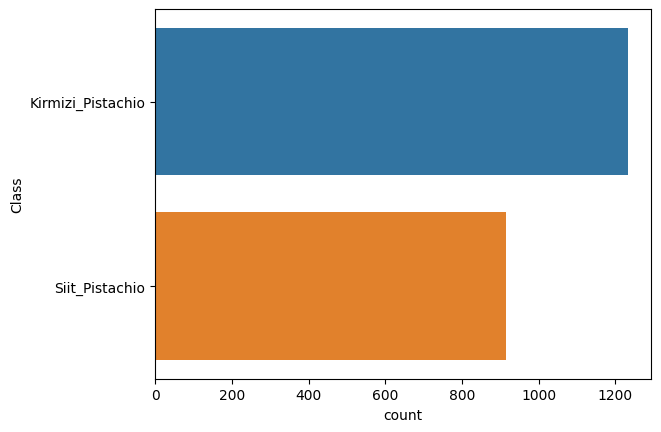

In [11]:
sns.countplot(data=df,y="Class")
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])

In [14]:
df['Class'].value_counts()

0    1232
1     916
Name: Class, dtype: int64

In [15]:
columns_to_drop = ['SHAPEFACTOR_1', 'SHAPEFACTOR_2', 'SHAPEFACTOR_3', 'SHAPEFACTOR_4']
df = df.drop(columns=columns_to_drop)


In [16]:
df.columns

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'Class'],
      dtype='object')

In [17]:
X = df.drop (columns='Class', axis=1)
Y = df['Class']

In [18]:
print(X)

        AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0      63391  1568.4050    390.3396    236.7461        0.7951  284.0984   
1      68358  1942.1870    410.8594    234.7525        0.8207  295.0188   
2      73589  1246.5380    452.3630    220.5547        0.8731  306.0987   
3      71106  1445.2610    429.5291    216.0765        0.8643  300.8903   
4      80087  1251.5240    469.3783    220.9344        0.8823  319.3273   
...      ...        ...         ...         ...           ...       ...   
2143   85983  1157.1160    444.3447    248.8627        0.8284  330.8730   
2144   85691  2327.3459    439.8794    278.9297        0.7732  330.3107   
2145  101136  1255.6190    475.2161    271.3299        0.8210  358.8459   
2146   97409  1195.2150    452.1823    274.5764        0.7945  352.1718   
2147   78466  2356.9080    445.9131    258.5125        0.8148  316.0791   

      SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ROUNDNESS  COMPACTNESS  
0       0.8665        7

In [19]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
2143    1
2144    1
2145    1
2146    1
2147    1
Name: Class, Length: 2148, dtype: int64


In [20]:
scaler = StandardScaler()

In [21]:
scaler.fit(X)

StandardScaler()

In [22]:
standarized_data = scaler.transform(X)

In [23]:
print(standarized_data)

[[-1.26229557  0.3793384  -1.72358958 ... -1.03878418 -1.15355007
   0.33058803]
 [-0.88367525  1.3748213  -1.09099947 ... -0.61636225 -1.60533844
   0.11279048]
 [-0.48493096 -0.47788077  0.18848508 ...  0.63673946  0.1218941
  -0.81677844]
 ...
 [ 1.61489872 -0.45369561  0.89300681 ... -0.61136318  1.11385399
   0.94356464]
 [ 1.33080009 -0.61456785  0.18291441 ... -1.04711597  1.35267657
   1.47570917]
 [-0.11317108  2.47933587 -0.01035424 ... -0.72175944 -1.84134028
  -0.09602573]]


In [24]:
X = standarized_data
Y = df['Class']

In [25]:
print(X)
print(Y)

[[-1.26229557  0.3793384  -1.72358958 ... -1.03878418 -1.15355007
   0.33058803]
 [-0.88367525  1.3748213  -1.09099947 ... -0.61636225 -1.60533844
   0.11279048]
 [-0.48493096 -0.47788077  0.18848508 ...  0.63673946  0.1218941
  -0.81677844]
 ...
 [ 1.61489872 -0.45369561  0.89300681 ... -0.61136318  1.11385399
   0.94356464]
 [ 1.33080009 -0.61456785  0.18291441 ... -1.04711597  1.35267657
   1.47570917]
 [-0.11317108  2.47933587 -0.01035424 ... -0.72175944 -1.84134028
  -0.09602573]]
0       0
1       0
2       0
3       0
4       0
       ..
2143    1
2144    1
2145    1
2146    1
2147    1
Name: Class, Length: 2148, dtype: int64


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, stratify=Y, random_state=2)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(2148, 12) (1718, 12) (430, 12)


In [28]:
classifier = svm.SVC(kernel='linear')

In [29]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [30]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [31]:
print('Akurasi data training adalah = ', training_data_accuracy)

Akurasi data training adalah =  0.8760186263096624


In [32]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [33]:
print('Akurasi data testing adalah = ', test_data_accuracy)

Akurasi data testing adalah =  0.8697674418604651


In [35]:
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,Class
0,63391,1568.405,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,0
1,68358,1942.187,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,0
2,73589,1246.538,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,0.5951,0.6767,0
3,71106,1445.261,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,0
4,80087,1251.524,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,0


In [36]:
input_data = (71106,1445.261,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshape)
print(std_data)

prediction = classifier.predict(std_data)
print()
print(prediction)
print()
if (prediction[0] == 0):
    print('Jenis Kirmizi Pistachio')
else :
    print('Jenis Siit Pistachio')

[[-0.674203    0.0513725  -0.51544475 -0.73375156  0.49399647 -0.63298865
   0.3728608  -0.82595484 -0.25260542  0.37387138 -0.66462197 -0.28238858]]

[0]

Jenis Kirmizi Pistachio


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [37]:
import pickle

In [38]:
filename = 'klasifikasi-pistachio.sav'
pickle.dump(classifier, open(filename,'wb'))
pickle.dump(scaler, open('scaler.sav','wb'))